In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import os
os.getcwd()

'C:\\Users\\sadhana reddy'

In [4]:
os.chdir('C:\\Users\\sadhana reddy\\Desktop\\Projects\\Titanic_DT')

In [5]:
os.getcwd()

'C:\\Users\\sadhana reddy\\Desktop\\Projects\\Titanic_DT'

In [6]:
titanic_train = pd.read_csv('Titanic_train.csv')

In [7]:
titanic_test = pd.read_csv('Titanic_test.csv')

In [8]:
titanic_train.shape

(891, 12)

In [9]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
titanic_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [12]:
pd.unique(titanic_train['Pclass'].values.ravel())

array([3, 1, 2], dtype=int64)

In [13]:
pd.unique(titanic_train['Survived'].values.ravel())

array([0, 1], dtype=int64)

In [14]:
pd.unique(titanic_train['SibSp'].values.ravel())

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [15]:
pd.unique(titanic_train['Parch'].values.ravel())

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [16]:
pd.unique(titanic_train['Embarked'].values.ravel())

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [19]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [20]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [21]:
#Feature Engineering
# As there are many passengers with no cabin, creating new column would help
#creating Has_cabin Attribute
titanic_train['Has_cabin'] = titanic_train['Cabin'].apply(lambda x: 0 if type(x)== float else 1)

In [22]:
titanic_train[['Has_cabin','Cabin']].head()

,Has_cabin,Cabin
0,0,NaN
1,1,C85
2,0,NaN
3,1,C123
4,0,NaN


In [23]:
#similarly applying for test set
titanic_test['Has_cabin'] = titanic_test['Cabin'].apply(lambda x: 0 if type(x)== float else 1)

In [24]:
# drop Cabin column from both train and test set
titanic_train = titanic_train.drop(['Cabin'], axis = 1)
titanic_test = titanic_test.drop(['Cabin'], axis = 1)

# 
As sibsp and parch indicate if the passenger has siblings, 
spouse, parents or children on board..modifying these 2 columns
to family

In [25]:
titanic_train['FamilySize'] = titanic_train['SibSp'] + titanic_train['Parch'] +1 
titanic_test['FamilySize'] = titanic_test['SibSp'] + titanic_test['Parch']+1

In [26]:
# drop Sibsp, Parch columns
titanic_train = titanic_train.drop(['SibSp','Parch'],axis = 1)
titanic_test = titanic_test.drop(['SibSp','Parch'],axis = 1)

In [27]:
from IPython import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [28]:
# As there are many null values in Age and it has 88 levels, creating age brackets
print('Total null values in Age :',titanic_train.Age.isnull().sum())
age_mean = titanic_train.Age.mean()
print('Age_mean:', age_mean)
age_std = titanic_train.Age.std()
print('Age_standard_deviation:',age_std)

Total null values in Age : 177
Age_mean: 29.69911764705882
Age_standard_deviation: 14.526497332334044


As the age in this dataset is not dependent and cannot be derived from any other columns
using normal distribution to fill in null values`

In [29]:
#creating random list
age_random_list = np.random.randint(low = age_mean-age_std,
                                    high = age_mean+age_std,
                                    size = titanic_train.Age.isnull().sum())

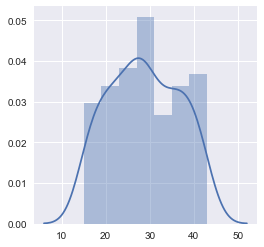

In [30]:
plt.figure(figsize=(4,4))
import seaborn as sns
sns.distplot(age_random_list)
plt.show();

replacing null values with above random normal distribution values

In [31]:
titanic_train.loc[np.isnan(titanic_train['Age']),'Age'] = age_random_list

Null values: 0


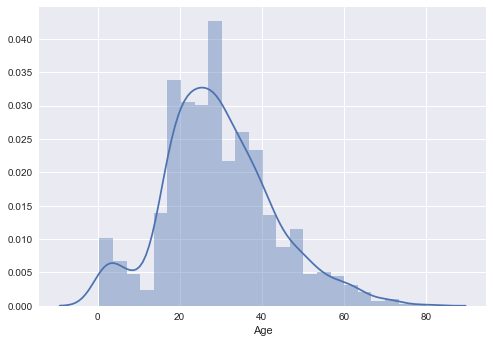

In [32]:
print('Null values:',titanic_train.Age.isnull().sum())
sns.distplot(titanic_train.Age)
plt.show();

### Similarly for Test set

In [33]:
print('Total null values in Age :',titanic_test.Age.isnull().sum())
age_mean = titanic_test.Age.mean()
print('Age_mean:', age_mean)
age_std = titanic_test.Age.std()
print('Age_standard_deviation:',age_std)

age_random_list = np.random.randint(low = age_mean-age_std,
                                    high = age_mean+age_std,
                                    size = titanic_test.Age.isnull().sum())

titanic_test.loc[np.isnan(titanic_test['Age']),'Age'] = age_random_list
print('Null values after imputation:',titanic_test.Age.isnull().sum())

Total null values in Age : 86
Age_mean: 30.272590361445783
Age_standard_deviation: 14.18120923562442
Null values after imputation: 0


In [34]:
# Extracting Titles from Name to map to Gender

In [35]:
import re
def get_title(Name):
    a = re.search(' ([A-Za-z]+)\.',Name)
    if a:
        return a.group(1)
    return ""

In [36]:
titanic_train['Title'] = titanic_train['Name'].apply(get_title)

In [37]:
titanic_train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [38]:
titanic_train.Sex.unique()

array(['male', 'female'], dtype=object)

In [39]:
titanic_train['Sex'] = titanic_train['Sex'].map({'male':1,'female':0})

In [40]:
titanic_train.groupby('Title')['Title','Sex'].agg({'Title':'count','Sex':'mean'})

,Title,Sex
Title,,
Capt,1,1.000000
Col,2,1.000000
Countess,1,0.000000
Don,1,1.000000
Dr,7,0.857143
Jonkheer,1,1.000000
Lady,1,0.000000
Major,2,1.000000
Master,40,1.000000


Mapping special titles under Rare title

In [41]:
titanic_train['Title'] = titanic_train['Title'].replace(
    ['Capt','Col','Don', 'Rev', 'Dr','Major', 'Lady', 'Sir','Countess','Jonkheer'],'Rare')

In [42]:
titanic_train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare', 'Mme', 'Ms', 'Mlle'], dtype=object)

mapping Ms,Mlle to Miss and Mme to Mrs

In [43]:
titanic_train['Title'] = titanic_train['Title'].replace({'Ms':'Miss','Mlle':'Miss','Mme':'Mrs'})

In [44]:
titanic_train['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

Now, we can drop Name and PassengerId columns

In [45]:
titanic_train = titanic_train.drop(['Name','PassengerId'], axis = 1)

In [46]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Ticket        891 non-null object
Fare          891 non-null float64
Embarked      889 non-null object
Has_cabin     891 non-null int64
FamilySize    891 non-null int64
Title         891 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


converting Age to int and Map Embarked and Title to int 
values to use for correlation matrix

In [47]:
titanic_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [48]:
titanic_train['Embarked'].isnull().sum()
titanic_train['Embarked'] = titanic_train['Embarked'].fillna('S')

2

In [49]:
titanic_train['Embarked'] = titanic_train['Embarked'].map({'S':0,'C':1,'Q':2}).astype('int64')

In [50]:
#Similarly for Title
titanic_train['Title'].unique()
titanic_train['Title'].isnull().sum()
titanic_train['Title'] = titanic_train['Title'].map(
    {'Mr':1,'Mrs':2,'Miss':3,'Master':4,'Rare':5})

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

0

In [51]:
titanic_train['Survived'] = titanic_train['Survived'].astype('int64')
titanic_train['Pclass'] = titanic_train['Pclass'].astype('int64')
titanic_train['Sex'] = titanic_train['Sex'].astype('int64')
titanic_train['Embarked'] = titanic_train['Embarked'].astype('int64')
titanic_train['Has_cabin'] = titanic_train['Has_cabin'].astype('int64')
titanic_train['Title'] = titanic_train['Title'].astype('int64')
titanic_train['Age'] = titanic_train['Age'].astype('int64')

In [52]:
#dropping Ticket column
titanic_train = titanic_train.drop('Ticket', axis =1)

### Understanding relationship between variables
using Pearson Correlation matrix

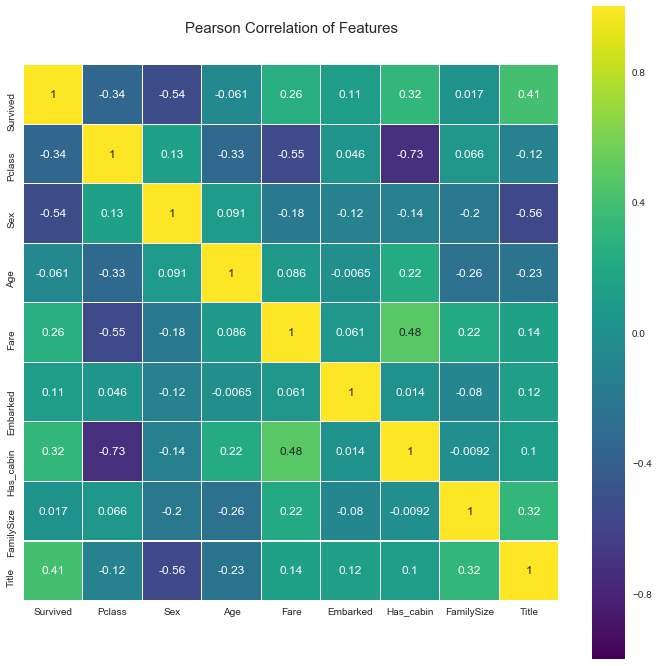

In [53]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(titanic_train.astype(int).corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)
plt.show();

As from earlier comparisions we have seen that sex and title are closely related which is reiterated in above correlation matrix. It can also seen that Has_cabin, PClass and Fare are also closely which is obvious.

Finding metrics across categories of features  to understand more about Title and Sex

In [54]:
titanic_train[['Sex','Title','Survived']].groupby(['Sex','Title']).agg(['mean','count','sum'])

Survived           
               mean count  sum
Sex Title                     
0   2      0.793651   126  100
    3      0.702703   185  130
    5      1.000000     3    3
1   1      0.156673   517   81
    4      0.575000    40   23
    5      0.250000    20    5

Only Rare category is split across categories of sex but since it has realtively very low count, it doesn't need not be manipulated further

In [55]:
#Calculating Gini index to find the impurity and the best split.

In [56]:
titanic_train.groupby('Survived')['Sex'].count()

Survived
0    549
1    342
Name: Sex, dtype: int64

In [57]:
549/(549+342)

0.6161616161616161

### GINI INDEX CALCULATIONS TO FIND THE BEST NODE
CALCULATING FIRST FOR TITLE AND SEX ATTRIBUTES TO DETERMINE BEST SPLIT
If a data set D contains examples from n classes, gini index, gini(D) is defined as 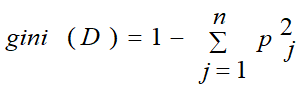

    		where pj is the relative frequency of class j in D

If a data set D  is split on A into two subsets D1 and D2, the gini index gini(D) is defined as 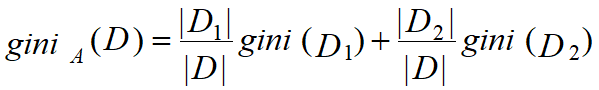

            where pj is the relative frequency of class j in D

Reduction in Impurity: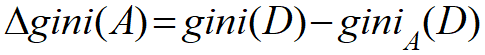

    where pj is the relative frequency of class j in D

The attribute provides the smallest ginisplit(D) (or the largest reduction in impurity) is chosen to split the node (need to enumerate all the possible splitting points for each attribute)


In [58]:
titanic_train.groupby(['Title','Survived'])['Survived'].count()

Title  Survived
1      0           436
       1            81
2      0            26
       1           100
3      0            55
       1           130
4      0            17
       1            23
5      0            15
       1             8
Name: Survived, dtype: int64

In [59]:
titanic_train.groupby(['Sex','Survived'])['Survived'].count()

Sex  Survived
0    0            81
     1           233
1    0           468
     1           109
Name: Survived, dtype: int64

In [60]:
len(titanic_train[(titanic_train.Title ==2)& (titanic_train.Survived == 0)])
len(titanic_train)

26

891

In [61]:
for s in range(0,len(titanic_train.Survived.unique())):
    G = 0
    for i in range(1,len(titanic_train.Title.unique())+1):
        print(i,s)
        Total = len(titanic_train)
        P_T = (len(titanic_train[(titanic_train.Title == i)& (titanic_train.Survived == s)]))/Total
        G = G + P_T**2
    G = 1 - G
    print('GINI index for G')

1 0
2 0
3 0
4 0
5 0
GINI index for G
1 1
2 1
3 1
4 1
5 1
GINI index for G


In [62]:
#building a decision tree
X = titanic_train.iloc[:,1:]
Y = titanic_train.iloc[:,0]

In [63]:
# Creating a validation set from training data and predict & Test if there is any overfitting

In [64]:
from sklearn.cross_validation import train_test_split
x_train,x_val,y_train,y_val = train_test_split(X,Y,test_size = 0.33,random_state = 0)

C:\Users\sadhana reddy\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [65]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state= 42,
                             max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
                             class_weight=None, presort=False)
DTC = DTC.fit(x_train,y_train)

In [66]:
y_pred = DTC.predict(x_val)

In [67]:
from sklearn.metrics import confusion_matrix,accuracy_score
CM = confusion_matrix(y_val,y_pred)
Accuracy = accuracy_score(y_val,y_pred)
CM
Accuracy

array([[153,  31],
       [ 30,  81]], dtype=int64)

0.79322033898305089

## Visualizing Decision Tree that was constructed with default parameters

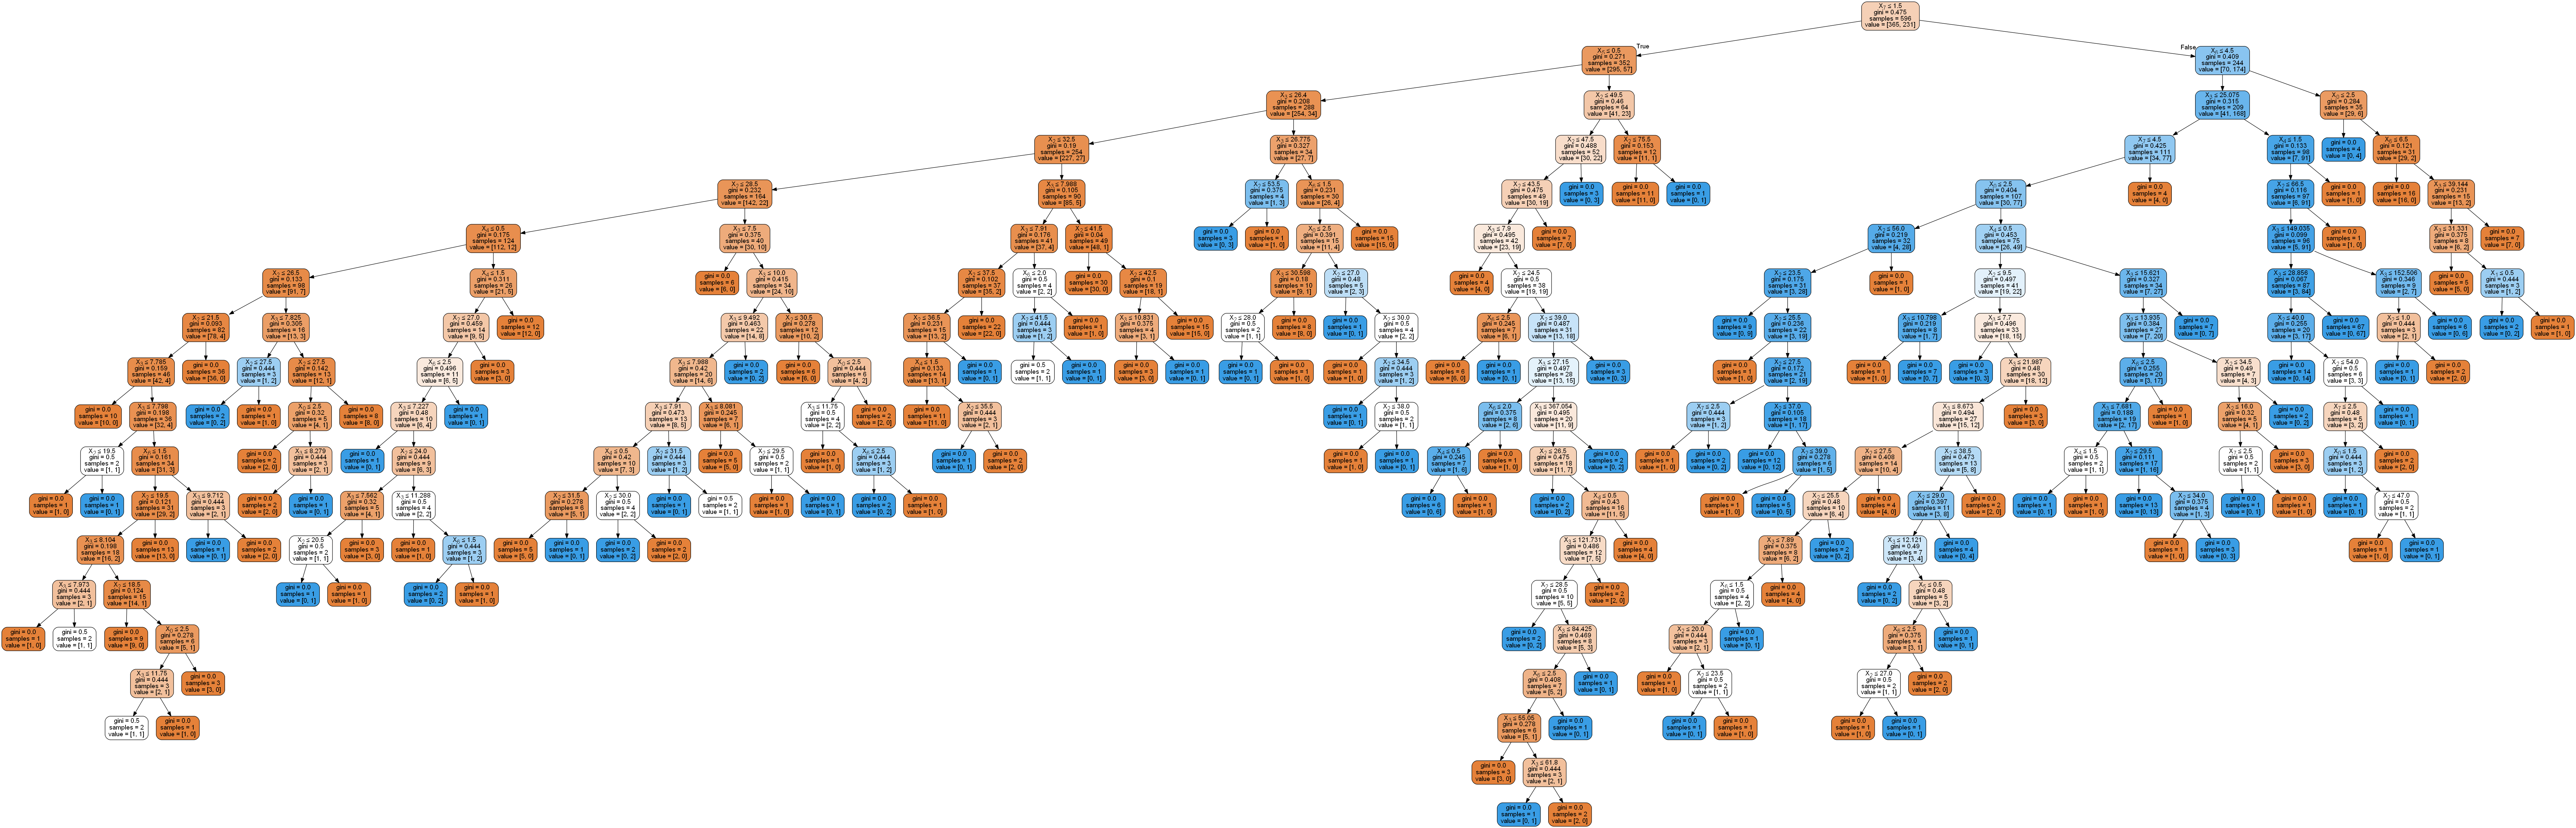

In [68]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(DTC, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [69]:
# ROC- Receiver Oerating Characterstics Curve

In [70]:
from sklearn.metrics import roc_curve
fpr,tpr,_ = roc_curve(y_val,DTC.predict_proba(x_val)[:,1]) # probability of survived class

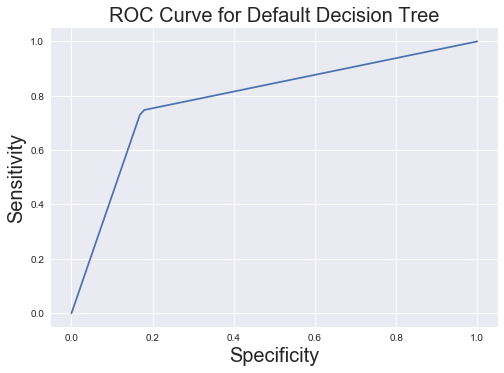

In [71]:
plt.plot(fpr,tpr)
plt.title('ROC Curve for Default Decision Tree', fontsize = 20)
plt.xlabel('Specificity', fontsize = 20)
plt.ylabel('Sensitivity', fontsize = 20)
plt.show();

In [72]:
# Cummulative Lift


In [73]:
# AUC - Area under Curve

In [74]:
# Hyperparameter tuning for above tree and reconstructing the tree to test on validation data